In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tk
from sklearn import linear_model as lm
from sklearn.metrics import mean_squared_error, r2_score

25189.737830492715
0.9905939869067717


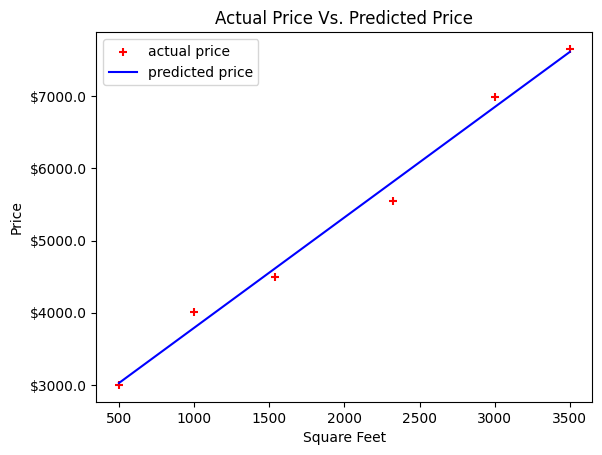

In [2]:
data = {
    "area":[500,1002,1540,2323,3000,3500],
    "price":[3000,4010,4500,5554,6994,7654]
}
df = pd.DataFrame(data)

X = df[['area']]
y = df.price

reg = lm.LinearRegression()
reg.fit(X,y)
y_predict = reg.predict(X)

# print(reg.coef_)
# print(reg.intercept_)
# print(5000*reg.coef_ + reg.intercept_)
# print(reg.predict([[5000]]))


# checking my work accurancy
print(mean_squared_error(y,y_predict))
print(r2_score(y,y_predict))
#converting my ylabel values into dollar instead of just number
def dollar_frmt(x, pos):
    return f'${x}'
#my formatter obj
frmt = tk.FuncFormatter(dollar_frmt)

#plotting the graph
plt.scatter(X,y,color='red',marker='+', label ='actual price')
plt.plot(X,y_predict,color='blue', label = 'predicted price')
plt.title("Actual Price Vs. Predicted Price")
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.legend()
#applying my fmrt
plt.gca().yaxis.set_major_formatter(frmt)
plt.show()

In [10]:
import pickle as pk
with open('pickle_model', 'wb') as f:
    pk.dump(reg, f)

In [17]:
import joblib

with open('joblib_model', 'wb') as f:
    joblib.dump(reg, f)

# Very Bad and Low Performance Model

### Our model’s low accuracy is likely due to the following issues:

Using OrdinalEncoder for Categorical Features:
Ordinal encoding assigns arbitrary integer values to categories, which can mislead linear models if there’s no true order. For nominal (unordered) categories like location, area_type, etc., use OneHotEncoder instead.

Feature Engineering:

You may have irrelevant or redundant features.
Try creating new features (e.g., price per sqft) or removing less useful ones.
Outliers:

Real estate data often has outliers. Remove or cap extreme values in price and total_sqft.
Model Choice:

Linear regression may not capture complex relationships. Try tree-based models like RandomForestRegressor or GradientBoostingRegressor.
Data Scaling:

Some models benefit from feature scaling (StandardScaler).


In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [4]:
df_bhd = pd.read_csv("bhd.csv")
df_bhd.drop(['balcony', 'society'], axis=1, inplace=True)
df_bhd['total_sqft'] = pd.to_numeric(df_bhd['total_sqft'], errors='coerce')
df_bhd.dropna(subset=['total_sqft', 'bath', 'location'], inplace=True)
df_bhd['total_sqft'] = df_bhd['total_sqft'].astype(int)



In [ ]:
X = df_bhd.drop("price", axis=1)
y = df_bhd.price

# Identify categorical and numerical columns
categorical_cols = ["area_type", "availability", "location", "size"]
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')

# Model pipeline
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(random_state=42))
])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)
pipeline.fit(X_train, y_train)
y_predict = pipeline.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_predict))
print("R2:", r2_score(y_test, y_predict))

MSE: 13190.82091067712
R2: 0.5840654939872976


In [ ]:
ord = OrdinalEncoder(handle_unknown='error')
X[categorical_cols] = ord.fit_transform(X[categorical_cols])

cn = X.corr()

,area_type,availability,location,size,total_sqft,bath
area_type,1.000000,-0.105880,0.030281,-0.093111,-0.049590,-0.100096
availability,-0.105880,1.000000,0.007772,0.085993,0.018054,0.062635
location,0.030281,0.007772,1.000000,0.010278,0.040901,0.003956
size,-0.093111,0.085993,0.010278,1.000000,0.313605,0.677182
total_sqft,-0.049590,0.018054,0.040901,0.313605,1.000000,0.387205
bath,-0.100096,0.062635,0.003956,0.677182,0.387205,1.000000


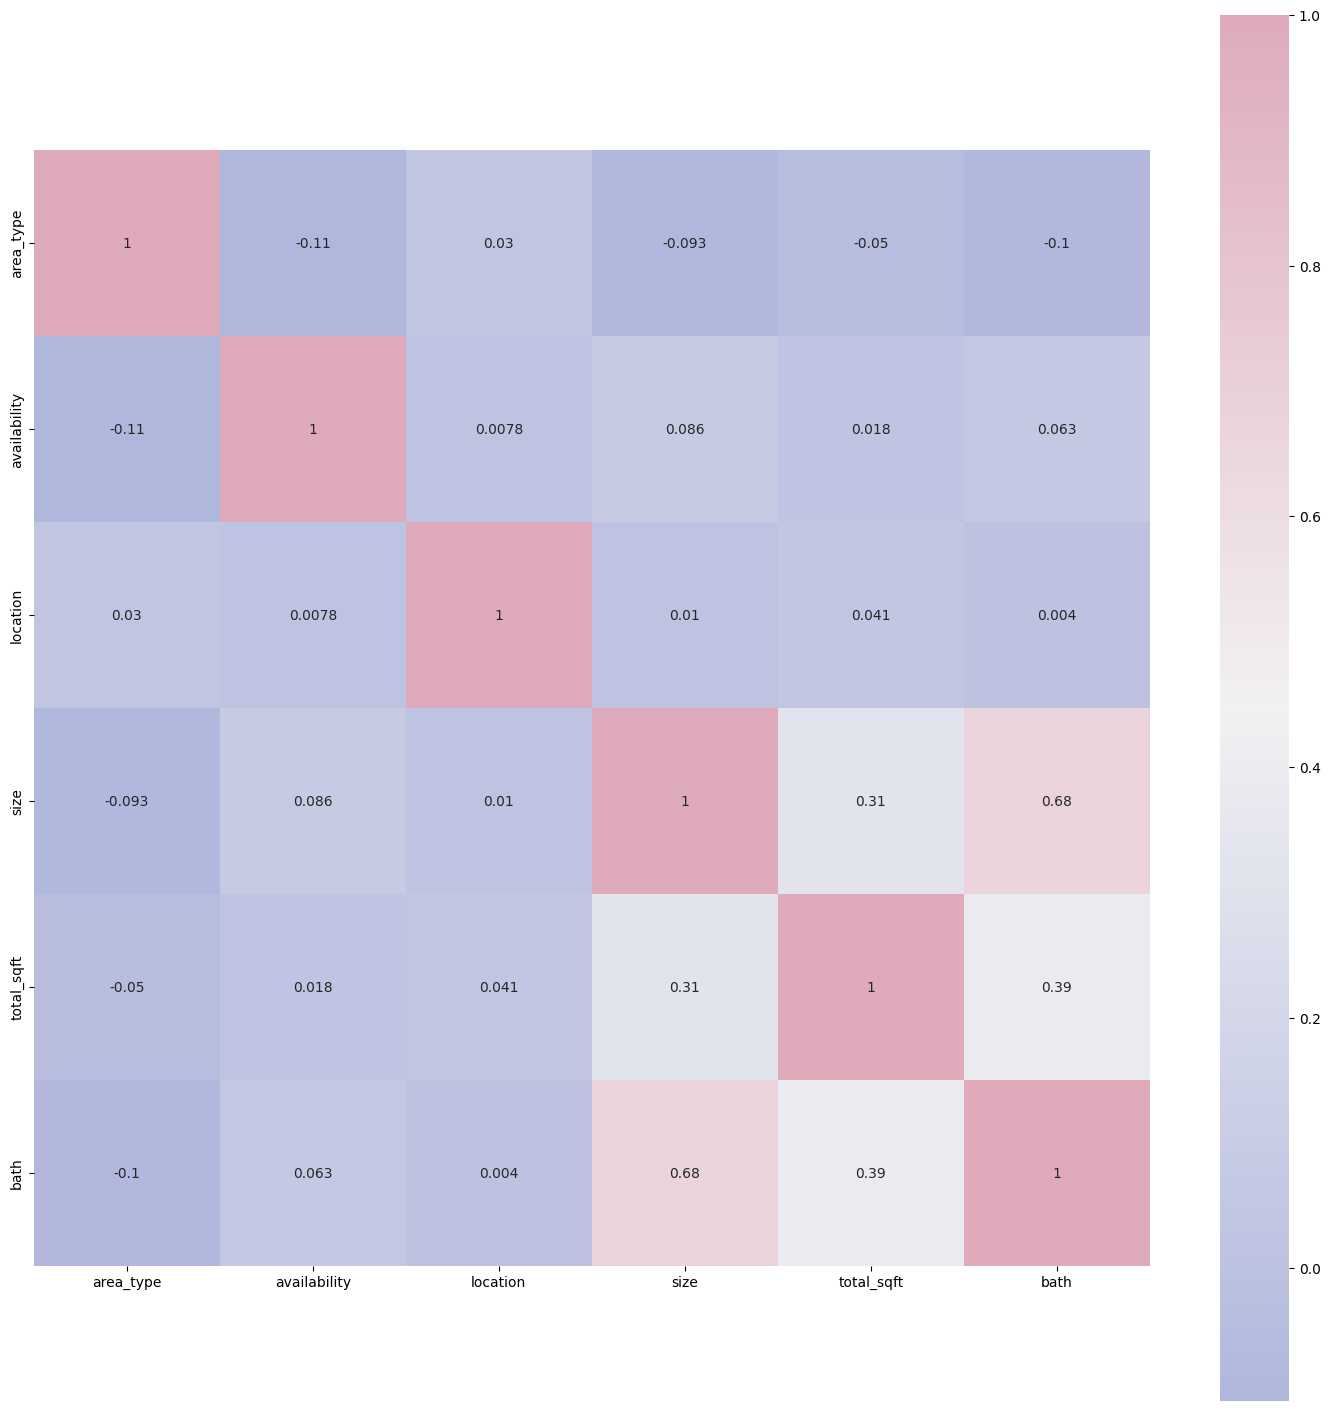

In [ ]:
import seaborn as sns
#Correlation 
cmap=sns.diverging_palette(260,-10,s=50, l=75, n=6,
as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(cn,cmap=cmap,annot=True, square=True)
plt.show()

In [ ]:
data2 = {"year":
         list(range(1970, 2017)),
         "per capital income (US)":
         [3399.299037,3768.297935,4251.175484,4804.463248,5576.514582,5998.144346,7062.131392,7100.12617,7247.967035,7602.912681,8355.96812,9434.390652,9619.438377,10416.53659,10790.32872,11018.95585,11482.89153,12974.80662,15080.28345,16426.72548,16838.6732,17266.09769,16412.08309,15875.58673,15755.82027,16369.31725,16699.82668,17310.75775,16622.67187,17581.02414,18987.38241,18601.39724,19232.17556,22739.42628,25719.14715,29198.05569,32738.2629,36144.48122,37446.48609,32755.17682,38420.52289,42334.71121,42665.25597,42676.46837,41039.8936,35175.18898,34229.19363]}

In [ ]:
df4 = pd.DataFrame(data2)
X = df4[['year']]
y =  df4['per capital income (US)'].sort_values(axis=0, ascending=True)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.4, random_state=42)
reg = lm.LinearRegression()
reg.fit(Xtrain, ytrain)

LinearRegression()

### finding optimal value of m,b and cost

My model performance
2783.663637351418
0.9226202230111812


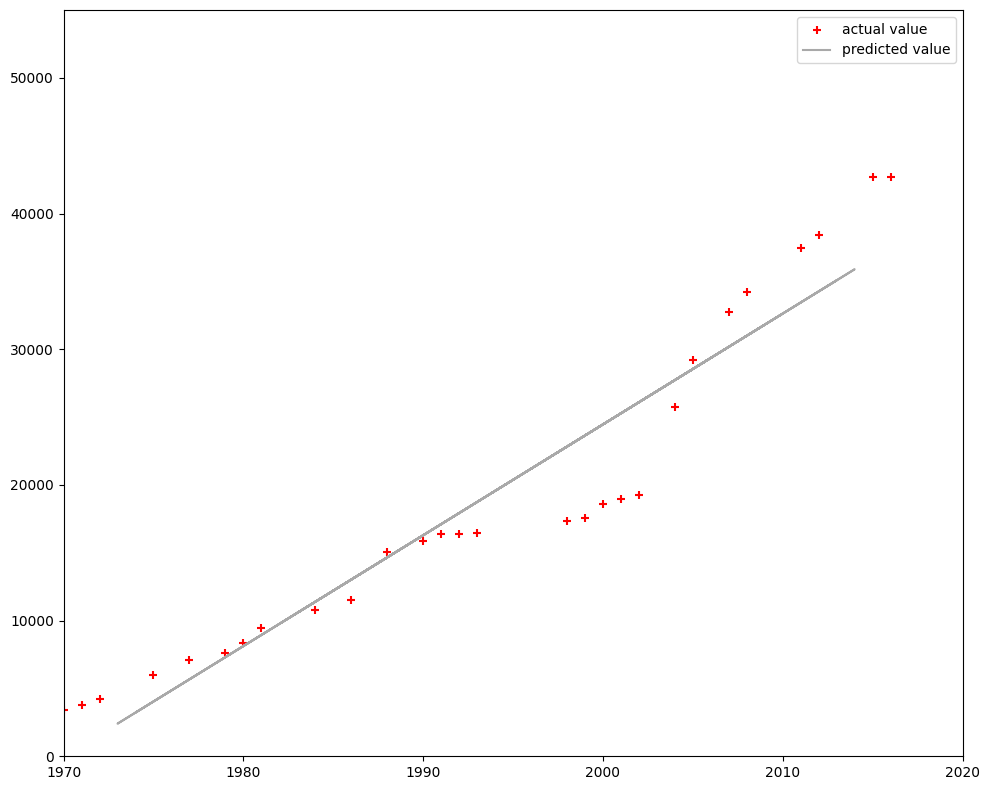

In [ ]:
y3_predict = reg.predict(Xtest)
from sklearn.metrics import mean_absolute_error

plt.figure(figsize=(10,8))
plt.scatter(Xtrain,ytrain, color='red', marker='+', label='actual value')
plt.plot(Xtest,y3_predict, color='darkgray', label = 'predicted value')
plt.legend()
plt.xlim(1970,2020)
plt.ylim(0,55000)
plt.tight_layout()

print('My model performance')
print(mean_absolute_error(ytest,y3_predict))
print(r2_score(ytest,y3_predict))